In [544]:
#Nazwa projektu - Cena za wymarzony dom

In [545]:
#Aim of the project is to create such model which will be able to predict SalePrice of house 
#for provided values of features. Features regard among others overall quality of the house, construction date
#size of garage, lot area and so on. All details about every feature (column) you can find in file: data_description.txt 
#in the same path.

In [546]:
#Imports

#data manipulation
import pandas as pd
import numpy as np

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pipeline construction
from sklearn.pipeline import Pipeline 

# data processing
from sklearn.preprocessing import StandardScaler

# data transformation
from sklearn.decomposition import PCA

# models training
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#models testing
from sklearn import metrics

In [547]:
#Read data from csv and display head of it
df = pd.read_csv('data.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [548]:
#All details about every column you can find in file: data_description.txt in the same path
#Display shape of data to see amount of rows and columns
df.shape

(1460, 81)

In [549]:
#There are 1460 rows and 81 columns

In [550]:
#Display info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [551]:
#Consider which columns should be removed due to too many missing data. We can find such columns:
#  #   Column         Non-Null Count  Dtype 
#  6   Alley          91 non-null     object
#  72  PoolQC         7 non-null      object 
#  73  Fence          281 non-null    object 
#  74  MiscFeature    54 non-null     object

In [552]:
#Declare amount of rows:
amount_of_rows = len(df.index)
amount_of_rows

1460

In [553]:
#Percent of missing values of Alley column:
df['Alley'].isna().sum()/amount_of_rows*100

93.76712328767123

In [554]:
#Percent of missing values of PoolQC column:
df['PoolQC'].isna().sum()/amount_of_rows*100

99.52054794520548

In [555]:
#Percent of missing values of Fence column:
df['Fence'].isna().sum()/amount_of_rows*100

80.75342465753424

In [556]:
#Percent of missing values of MiscFeature column:
df['MiscFeature'].isna().sum()/amount_of_rows*100

96.30136986301369

In [557]:
#Removing above columns due to their percent of missing values are more than 80%:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis='columns')
df.shape

(1460, 77)

In [558]:
corr = df.corr()

<AxesSubplot:>

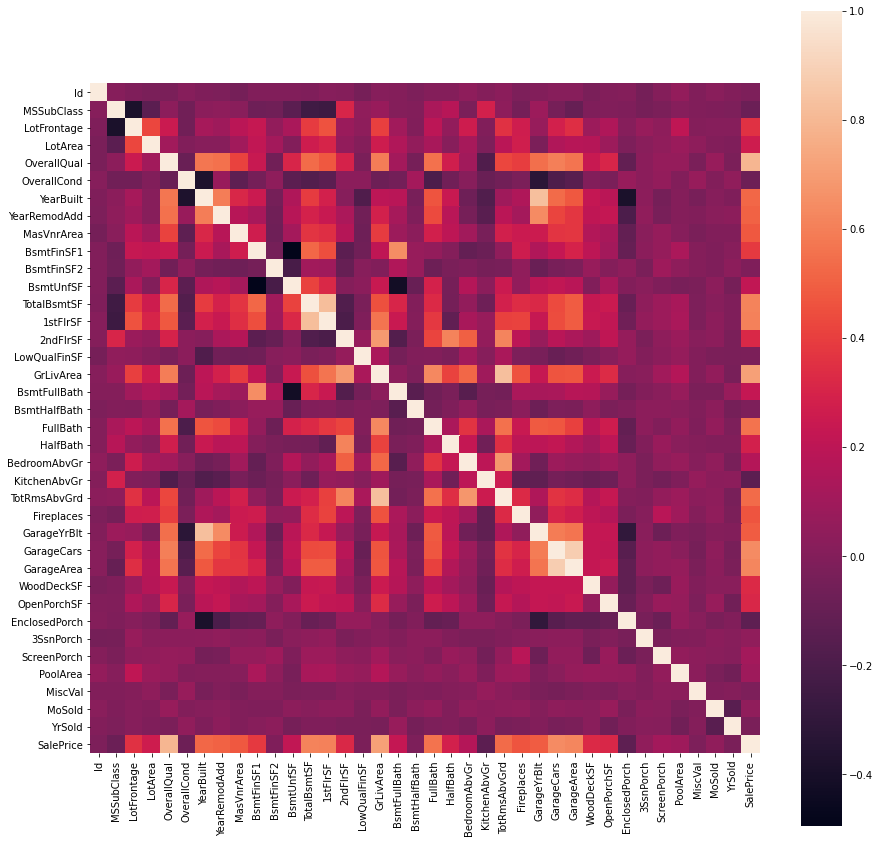

In [559]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, square=True)

In [560]:
#In the heatmap we can see correlation between features. Among others we can see that OverallQual
#is most correlated to SalePrice. Apart from the feature also YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea
#GarageCars, GarageArea are quite correlated to SalePrice. We can also see characteristic squares -
#bigger one consists of GarageBlt, GarageCars and GarageAre, the smaller one consists of 
#TotalBsmtSF and 1stFlrSF - we can see these features correlate each other quite strongly.

In [561]:
#There are still missing data. Let's see which columns have missing data now

In [562]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [563]:
df.loc[:, df.isnull().any()]

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA
1456,85.0,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA
1457,66.0,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA
1458,68.0,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA


In [564]:
df.loc[:, df.isnull().any()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   FireplaceQu   770 non-null    object 
 10  GarageType    1379 non-null   object 
 11  GarageYrBlt   1379 non-null   float64
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [565]:
#We can see every Garage related column has the same amount of non-null values. 
#We can assume they regard the same rows. Let's check it.

In [566]:
#Display all related Garage columns (including columns which have all non-null values).
#Additionally show only rows for GarageType = null
df_garage_cols = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']]
df_garage_cols[df_garage_cols['GarageType'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [567]:
#It seems all null values for columns 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'
#are situated in the same rows. Even columns 'GarageCars', 'GarageArea' seem to have onlu 0 values. 
#Let's check for sure - let's display columns where 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 
#'GarageCond' have only null values and 'GarageCars', 'GarageArea' have only 0 values

In [568]:
df_garage_cols[df_garage_cols['GarageType'].isnull() & 
               df_garage_cols['GarageYrBlt'].isnull() &
               df_garage_cols['GarageFinish'].isnull() &
               df_garage_cols['GarageQual'].isnull() & 
               df_garage_cols['GarageCond'].isnull() &
               (df_garage_cols['GarageCars'] == 0) &
               (df_garage_cols['GarageArea'] == 0)]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN,0,0
1407,NaN,NaN,NaN,NaN,NaN,0,0
1449,NaN,NaN,NaN,NaN,NaN,0,0
1450,NaN,NaN,NaN,NaN,NaN,0,0


In [569]:
#We can see again 81 rows. So we confirmed what we assumed earlier.
#As they all regard Garage we can delete those columns with missing data
#Apart from Garage related features we have such columns with missing data yet:
#- LotFrontage - Linear feet of street connected to property - ok, it can be significant (heatmap says similarly)
#- MasVnrType, MasVnrArea - related to masonry veneer - is client realy wondering about it? 
#- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 - for basement related features TotalBsmtSF
#is kind of representative of them (heatmap reflects that)
#- Electrical - Electrical system - is client realy wondering about it?
#- FireplaceQu - amount of non-null values equals 770 (so it is bit low) and it looks Fireplaces feature
#which has all values should be enough to cover Fireplace features (Fireplaces says about
#number of fireplaces whereas FireplaceQu says about quality - Fireplaces feature seems to be more basic
#and valuable)

#Apart from above columns - column Id is not valuable here - it tells us about order of rows only

In [570]:
#Let's delete all columns which we listed above (except for LotFrontage)

In [571]:
df = df.drop(['Id', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'], axis='columns')
df.shape

(1460, 62)

In [572]:
#For LotFrontage we will use below function for imputing data (in that case we may use mean value)

In [573]:
#As imput value we will use mean of particular column
def impute_num_cols(X, columns: list):
        for col in columns:
            mean = X[col].mean()
            X[col] = X[col].fillna(mean)

In [574]:
impute_num_cols(df,['LotFrontage'])

In [575]:
#Confirm if there is any null value
df.isnull().values.any()

False

In [576]:
#It's false so we can go to next steps

In [577]:
#Let's see current list of columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [578]:
#In the data frame there are types: int64(34), object(27). Let's create numeric columns and categorical columns
num_columns = df.select_dtypes(include=['int64'])
cat_columns = df.select_dtypes(exclude=['int64'])

In [579]:
num_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtFinSF2     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  LowQualFinSF   1460 non-null   int64
 13  GrLivArea      1460 non-null   int64
 14  BsmtFullBath   1460 non-null   int64
 15  BsmtHalfBath   1460 non-null   int64
 16  FullBath       1460 non-null   int64
 17  HalfBath       1460 non-null   int64
 18  BedroomAbvGr   1460 non-null   int64
 19  Kitche

In [580]:
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1460 non-null   float64
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  RoofStyle      1460 non-null   object 
 14  RoofMatl       1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  ExterQual      1460 non-null   object 
 18  ExterCon

In [581]:
#Let's split data into training and test set. Let's try with only numeric features - some of them are quite good
#correlated to SalePrice (what we saw in heatmap) and regard rather more important things like:
#OverallQual and LotArea.
df = num_columns
#Let's confirm shape of data used for train_test_split
df.shape

(1460, 34)

In [582]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), 
                                                    df['SalePrice'], 
                                                    test_size=0.2,
                                                    random_state=12)

In [583]:
#Let's standarize data to mean = 0, variance = 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [584]:
X_test_scaled = scaler.transform(X_test)

In [585]:
X_train_scaled

array([[ 3.18146735e-01, -5.59028911e-01, -8.02576142e-01, ...,
        -8.95177212e-02, -4.63196194e-01,  1.35573818e-01],
       [-8.74393016e-01,  1.87762909e+01,  6.51898542e-01, ...,
        -8.95177212e-02, -9.23852587e-02,  8.82508813e-01],
       [-6.35885066e-01,  1.26586597e-02, -1.52981348e+00, ...,
         8.15404275e-01,  6.49236612e-01, -6.11361178e-01],
       ...,
       [ 2.46471829e+00, -6.35755643e-01,  6.51898542e-01, ...,
        -8.95177212e-02, -1.20481806e+00, -1.35829617e+00],
       [ 5.56654685e-01,  6.61623632e-01, -7.53388000e-02, ...,
        -8.95177212e-02, -9.23852587e-02,  8.82508813e-01],
       [-1.58869165e-01,  2.19435365e-01, -7.53388000e-02, ...,
        -8.95177212e-02, -9.23852587e-02,  1.35573818e-01]])

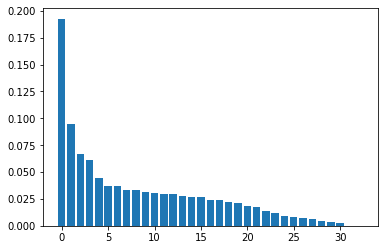

In [586]:
#Let's run PCA to check influence of every feature to understand how many dimensions we need
pca = PCA()
pca.fit(X_train_scaled)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [587]:
#Let's say we will use 5 components for PCA because they seem to be significantly higher then rest ones
pca = PCA(n_components=5)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

lr = LinearRegression()
#Learning on LR on the scaled training data
lr.fit(X_train_scaled_pca, y_train)

LinearRegression()

In [588]:
#Scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled_pca),y_true = y_test)) )

Scaled test set R2: 0.76


In [589]:
#Let's use pipeline for those steps
pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("pca", PCA(n_components=5)),
    ("LR", LinearRegression())    
])

In [590]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('LR', LinearRegression())])

In [591]:
#Scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) )

Scaled test set R2: 0.76


In [592]:
#It looks nicer with the pipeline but we are still not sure about number of components
#which we should use for PCA. Of course - we can use trial & error method but it's better to use
#automated tool for such searching - it is GridSearch. Let's create GridSearch accordingly:

In [596]:
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=5)),
        ("LR", LinearRegression())    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 33)}

In [597]:
#Let's define kfold for cross validation
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=12)

In [598]:
#Let's run GridSearch
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('LR', LinearRegression())]),
             param_grid={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'scaler': [StandardScaler(), None]})

In [599]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'pca__n_components': 27, 'scaler': StandardScaler()}
Test R2: 0.78


In [608]:
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=5)),
        ("SVR", SVR(kernel='rbf', gamma=0.1))    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 33),
            "SVR__C": [100000, 1000000], 
            "SVR__gamma": [1, 10]
             }

In [609]:
#Let's run GridSearch
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=5)),
                                       ('SVR', SVR(gamma=0.1))]),
             param_grid={'SVR__C': [100000, 1000000], 'SVR__gamma': [1, 10],
                         'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'scaler': [StandardScaler(), None]})

In [610]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'SVR__C': 1000000, 'SVR__gamma': 1, 'pca__n_components': 1, 'scaler': StandardScaler()}
Test R2: 0.78


In [ ]:
#Conclusions: It looks the R2 result is the same for LinearRegression and SVM.
#However in SVM we can tune hyper-parameters yet. The R2 result is quite good but of course 
#it can be much closer to 1.00.
#Apart from LinearRegression and SVM we can also use other models such 
#RandomForestRegressor, GradientBoostingRegressor and so on.
#To improve the model we can also try to analyze categorical features as well an merge such
#transformation to existing model using for example FeatureUnion from sklearn.pipeline. But We need to keep
#in mind that when we use OneHotEncoder then amount of additional columns increases accordingly 
#to amount of particular values in column. 